In [1]:
import os
from maze_env import Maze
from Double_dqn import DRL
import time
import numpy as np

In [2]:
# if __name__ == "__main__":
env = Maze()
rl = DRL(env)
print('{0}x{1}, act_space = {2}'.format(env.MAZE_Limit[0],env.MAZE_Limit[1], len(env.action_space)))
# env.bind('<KeyPress>', onKeyPress)
# env.mainloop()

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
4x4, act_space = 4


In [3]:
rl.Double_QDN.iteration(500)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:32<00:00, 15.44it/s]


In [4]:
Avalue = np.squeeze(np.transpose(np.array(rl.Double_QDN.Avalue), (2, 0, 1)))
print(Avalue)
print("[Max] Action to State-value\n",np.max(Avalue,axis=0).reshape(env.MAZE_Limit[1],env.MAZE_Limit[0]))
print("[Max] Best action in each state\n",np.argmax(Avalue,axis=0).reshape(env.MAZE_Limit[1],env.MAZE_Limit[0]))

[[ 8.4669933e+00  4.4512405e+00  2.5703840e+00  1.0205373e+00
   1.0102759e+01  3.1585567e+00 -4.8632622e-03 -2.4193382e+00
   8.7802238e+00  1.8360213e+00 -2.4451871e+00 -5.7097597e+00
   7.4576883e+00  5.1348627e-01 -4.5096397e+00 -7.8171320e+00]
 [-2.5391316e+00  7.6335448e-01  1.6743503e+00  2.8590119e+00
  -3.4310381e+00  7.3134416e-01  1.5340726e+00  2.5095339e+00
  -1.3013513e+00  2.8610313e+00  4.0097780e+00  4.0878215e+00
   8.2833534e-01  4.9907174e+00  6.9790716e+00  7.0258904e+00]
 [-1.5863345e+00 -2.2957592e+00 -1.2785642e+00 -4.4448298e-01
   2.3940779e-02  9.2767996e-01  3.0033615e+00  4.2751575e+00
   6.0252637e-01  1.5062655e+00  4.0677638e+00  7.1558266e+00
   1.1811123e+00  2.0848517e+00  4.1844931e+00  7.3521471e+00]
 [ 8.8954048e+00  1.0048242e+01  9.4076405e+00  8.9335337e+00
   5.2228351e+00  3.3533273e+00  2.3549285e+00  1.5174022e+00
   2.7489605e+00  8.7945247e-01 -9.7309709e-01 -2.8185575e+00
   2.7508545e-01 -1.5944223e+00 -3.4516962e+00 -5.2980461e+00]]
[Ma

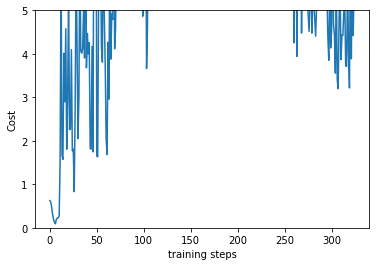

In [5]:
rl.Double_QDN.plot_cost()

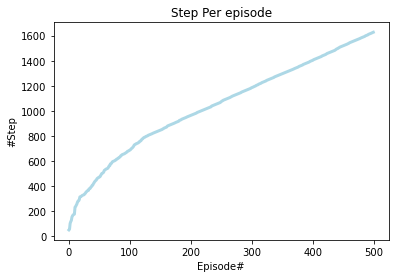

In [7]:
hist = np.asarray(rl.Double_QDN.hist)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(hist[:,0], hist[:,1], color='lightblue', linewidth=3)
ax.set(title="Step Per episode", xlabel="Episode#", ylabel="#Step")
plt.show()